In [1]:
# Data Read
import pandas as pd
from pandas import Series, DataFrame

# Data Analysis and Visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read Titanic data

train_data = pd.read_csv("train.csv")
train_data.head() # See first 5 (by default) dataframes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info() # Used to check for NaN objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Get some Stats
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!

First some basic questions:

    1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
    2.) What deck were the passengers on and how does that relate to their class?
    3.) Where did the passengers come from?
    4.) Who was alone and who was with family?
    
Then we'll dig deeper, with broader questions:

    5.) What factors helped someone survive the sinking? <- End target based on previous information
    6.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
    7.) Did having a family member increase the odds of surviving the crash?
    
Project Objective:
Determine the Factors (Age <Categorized into Child, Adult, Senior>, Gender, Family, Deck Position of Passenger, Passenger Class which may affect the Deck Position of Passenger) that affect the Survival of Passengers.



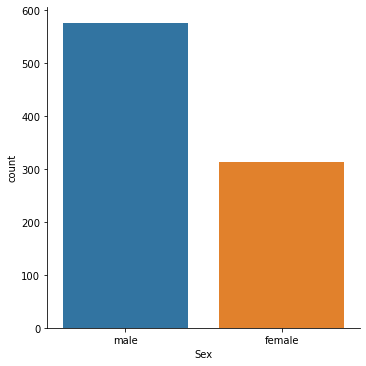

In [5]:
# Gender Comparison
sns.catplot(x = 'Sex', data = train_data, kind = 'count')

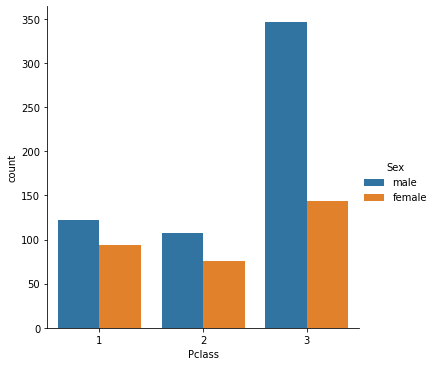

In [6]:
# Gender separated by Passenger Class Comparison
sns.catplot(x = 'Pclass', data = train_data, kind = 'count', hue = 'Sex')

In [7]:
# Data Processing - Child, Female and Male Categories

def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex

# We'll define a new column called 'person', remember to specify axis=1 for columns and not index
train_data['person'] = train_data[['Age','Sex']].apply(male_female_child, axis=1)

In [8]:
train_data.head(n = 10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


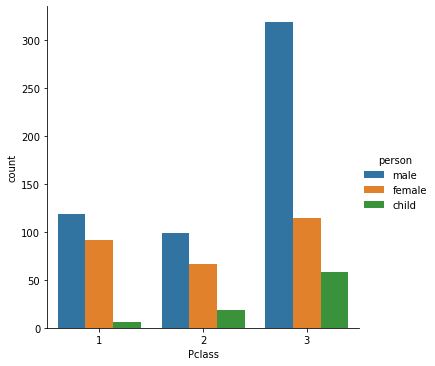

In [9]:
# Let's try the factorplot again!
sns.catplot(x = 'Pclass', data = train_data, kind = 'count', hue = 'person')

<AxesSubplot:>

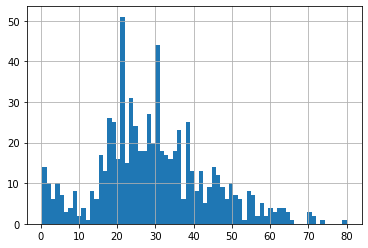

In [10]:
# Quick way to create a histogram using pandas
train_data['Age'].hist(bins=70)

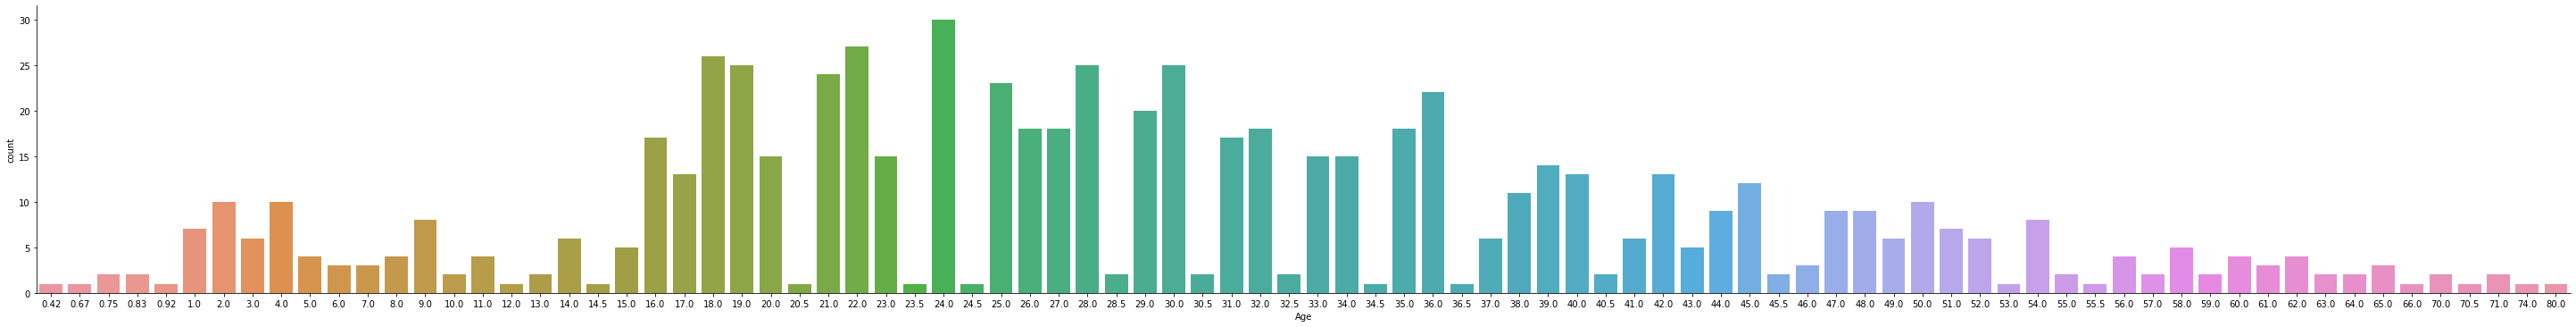

In [11]:
# Age Analysis
sns.catplot(x = 'Age', data = train_data, kind = 'count', aspect = 8) # How to apply bins to this?

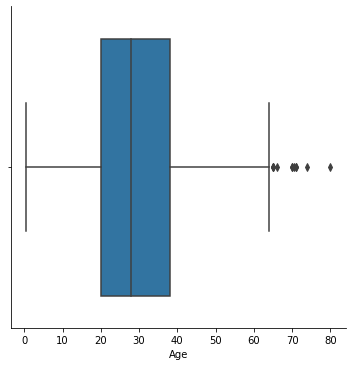

In [12]:
sns.catplot(x = 'Age', data = train_data, kind = 'box')

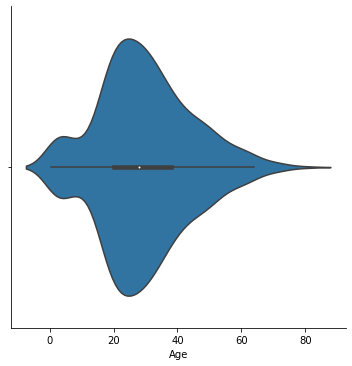

In [13]:
sns.catplot(x = 'Age', data = train_data, kind = 'violin')

In [14]:
# We could also get a quick overall comparison of male,female,child
train_data['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

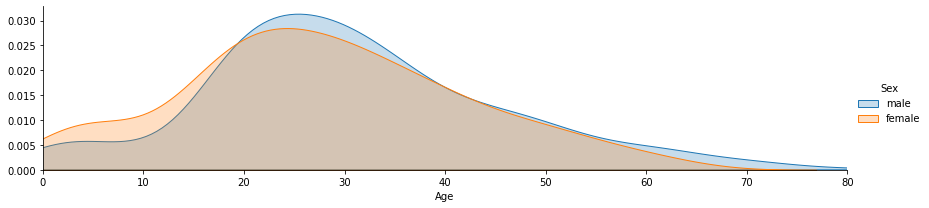

In [15]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(train_data, hue= "Sex", aspect = 4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot, 'Age', shade = True)

# Set the x max limit by the oldest passenger
oldest = train_data['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0, oldest))

#Finally add a legend
fig.add_legend()

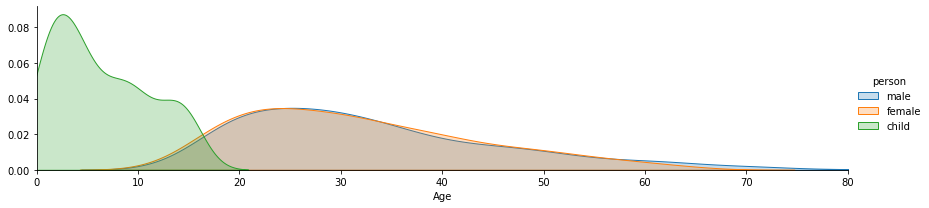

In [16]:
# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(train_data, hue= "person", aspect = 4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot, 'Age', shade = True)

# Set the x max limit by the oldest passenger
oldest = train_data['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0, oldest))

#Finally add a legend
fig.add_legend()

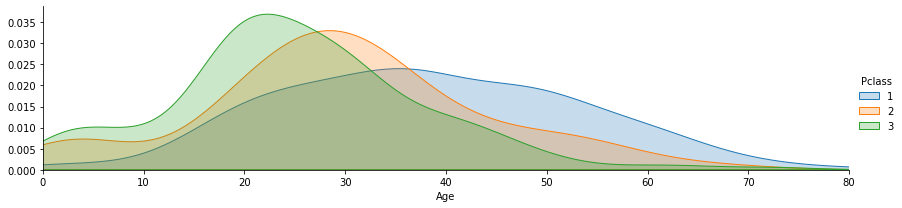

In [17]:
# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(train_data, hue= "Pclass", aspect = 4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot, 'Age', shade = True)

# Set the x max limit by the oldest passenger
oldest = train_data['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0, oldest))

#Finally add a legend
fig.add_legend()

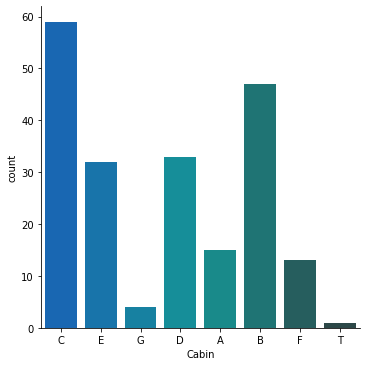

In [18]:
# Get Deck Position from Cabin data

deck = train_data['Cabin'].dropna()

deck.head()

# Set empty list
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])    

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot(x = 'Cabin', data = cabin_df, kind = 'count', palette='winter_d') # Found a T Cabin / Deck that doesn't fit

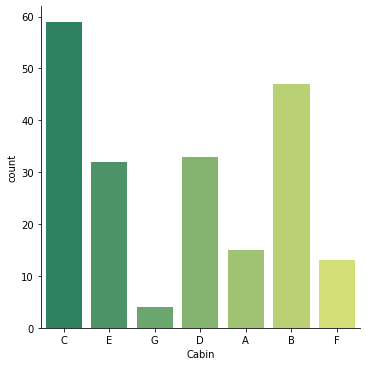

In [19]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
sns.catplot(x = 'Cabin', data = cabin_df, kind = 'count', palette='summer')

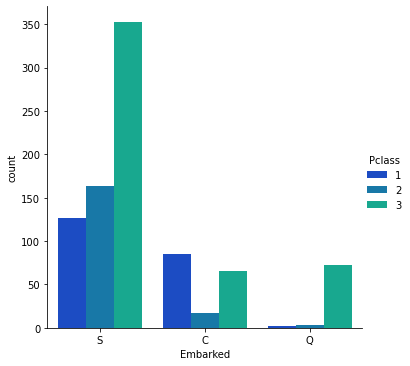

In [20]:
# Embarked data split into passenger class
sns.catplot(x = 'Embarked', hue = 'Pclass', data = train_data, kind = 'count', palette='winter')

In [21]:
# Data Processing - Who was alone and who was with company?
# We'll add the parent/child column with the sibsp column
train_data['Alone'] =  train_data.Parch + train_data.SibSp
train_data['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [22]:
# Look for >0 or ==0 to set alone status
train_data['Alone'].loc[train_data['Alone'] > 0] = 'With Family'
train_data['Alone'].loc[train_data['Alone'] == 0] = 'Alone'

# Note it's okay to ignore an  error that sometimes pops up here. For more info check out this link
# url_info = 'http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning'

train_data['Alone']

D:\Programs\Anaconda\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0      With Family
1      With Family
2            Alone
3      With Family
4            Alone
          ...     
886          Alone
887          Alone
888    With Family
889          Alone
890          Alone
Name: Alone, Length: 891, dtype: object

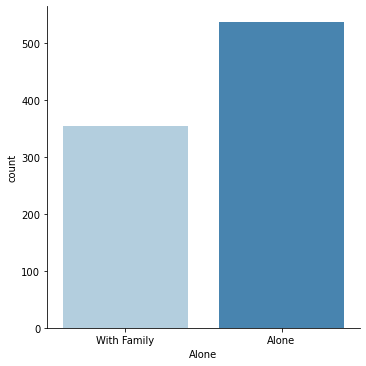

In [23]:
sns.catplot(x = 'Alone', data = train_data, kind = 'count', palette='Blues')

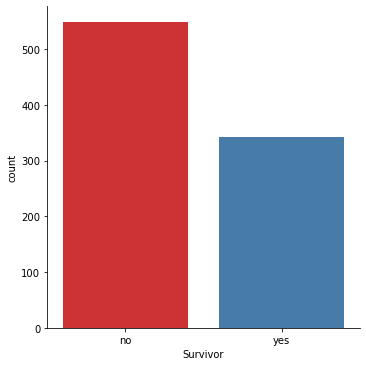

In [24]:
# Let's start by creating a new column for legibility purposes through mapping (Lec 36)
train_data["Survivor"] = train_data.Survived.map({0: "no", 1: "yes"})

# Let's just get a quick overall view of survied vs died. 
sns.catplot(x = 'Survivor', data = train_data, kind = 'count', palette = 'Set1')

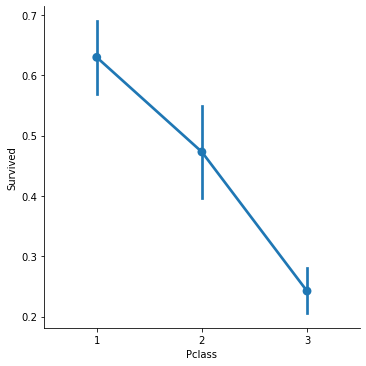

In [26]:
# Survival Rate compared to Pclass
sns.catplot(x = 'Pclass', y = 'Survived', data = train_data, kind = 'point')

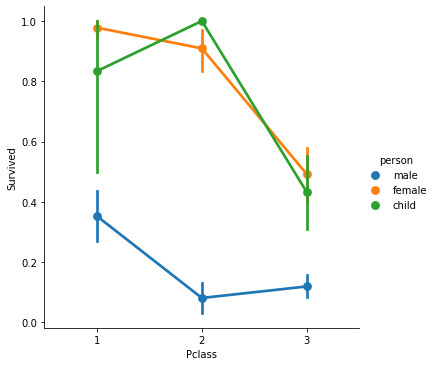

In [27]:
# Survival Rate compared to Pclass separated by person
sns.catplot(x = 'Pclass', y = 'Survived', data = train_data, kind = 'point', hue = 'person')

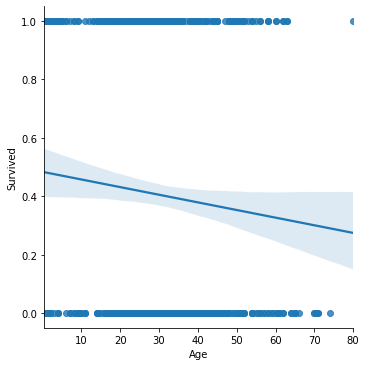

In [28]:
# Let's use a linear plot on age versus survival
sns.lmplot(x = 'Age', y = 'Survived', data = train_data)

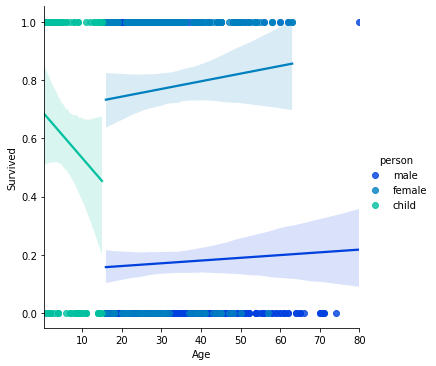

In [29]:
# Let's use a linear plot on age versus survival separated for person
sns.lmplot(x = 'Age', y = 'Survived', data = train_data, hue = 'person', palette = 'winter')

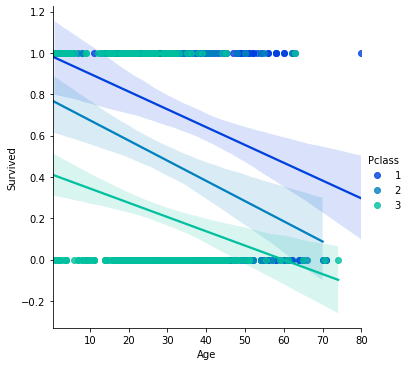

In [30]:
# Let's use a linear plot on age versus survival separated for passenger class
sns.lmplot(x = 'Age', y = 'Survived', data = train_data, hue = 'Pclass', palette = 'winter')

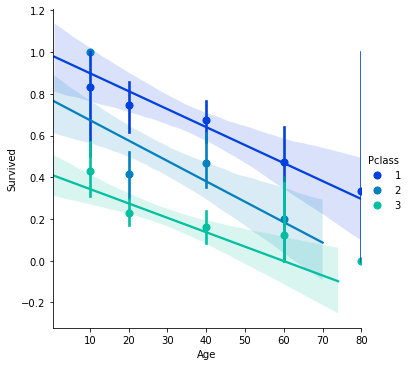

In [31]:
# Let's use a linear plot on age versus survival using hue for class seperation
generations=[10,20,40,60,80]
sns.lmplot(x = 'Age', y = 'Survived', hue = 'Pclass', data = train_data, palette = 'winter', x_bins = generations)

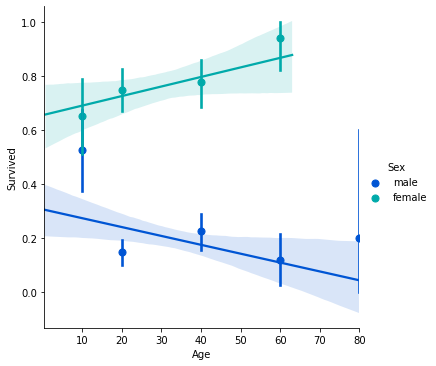

In [32]:
sns.lmplot(x = 'Age', y = 'Survived', hue = 'Sex', data = train_data, palette = 'winter', x_bins = generations)